## Report 6. 필기체 숫자 분류

MNIST에서 제공한 필기체 숫자 인식 문제(강의자료 8-14쪽) 에 대한   노트북 소스코드를 참고하여 학습데이터 5000개,

테스트 데이터 2000개에  대한 2-class (숫자 0인지 아닌지) 분류문제를 3-NN, LogisticRegression  알고리즘으로 해결하세요.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [19]:
# 데이터셋 가져오기
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

"""as_framebool or ‘auto’, default=’auto’
If True, the data is a pandas DataFrame including columns with appropriate
dtypes (numeric, string or categorical). The target is a pandas DataFrame or Series
 depending on the number of target_columns. The Bunch will contain a frame attribute
  with the target and the data. If return_X_y is True, then (data, target) will
   be pandas DataFrames or Series as describe above."""

'as_framebool or ‘auto’, default=’auto’\nIf True, the data is a pandas DataFrame including columns with appropriate \ndtypes (numeric, string or categorical). The target is a pandas DataFrame or Series depending on the number of target_columns. The Bunch will contain a frame attribute with the target and the data. If return_X_y is True, then (data, target) will be pandas DataFrames or Series as describe above.'

In [17]:
# 가져온 mnist 데이터셋의 키값 확인
print(mnist.keys())
# mnist 데이터셋의 설명 확인
print('mnist.DESCR= ', mnist.DESCR)
# mnist 데이터셋의 특징이름 확인
print('mnist.feature_names= ', mnist.feature_names)
# mnist 데이터셋의 첫번째 데이터의 200개 속성값 확인
print('mnist.data[0][:200]=', mnist.data[0][:200])
# mnist 데이터셋의 첫번째 target 값만 확인
print('mnist.target[0]= ', mnist.target[0])
# mnist 데이터셋의 첫번재 target 값의 속성 확인
print('type(mnist.target[0])= ', type(mnist.target[[0]]))

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
mnist.DESCR=  **Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey lev

In [18]:
#데이터와 목표값을 X, y 변수로 저장(행렬, 벡터)
X, y = mnist['data'], mnist['target']
print(X.shape)

# y의 속성을 숫자형으로 변환
y = y.astype(np.uint8)

(70000, 784)


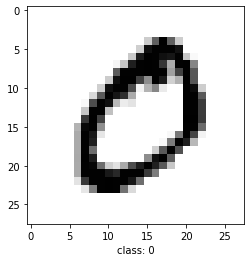

In [20]:
some_digit = X[1]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap=plt.cm.binary)
plt.xlabel('class: '+str(y[1]))
plt.show()

In [22]:
# 일부 데이터를 사용할 경우, train 5000, test 2000
# 앞쪽 데이터 5000개를 학습데이터로, 테스트 데이터라인 60000인덱스 뒤에서 2000개를 테스트
#   데이터로 추출
train_size = 5000
test_size = 2000
test_index = 60000 + test_size
X_train, X_test, y_train, y_test = X[:train_size], X[60000:test_index], y[:train_size], y[60000:test_index]
print('X_train= ',X_train.shape)
print('X_test= ', X_test.shape)

X_train=  (5000, 784)
X_test=  (2000, 784)


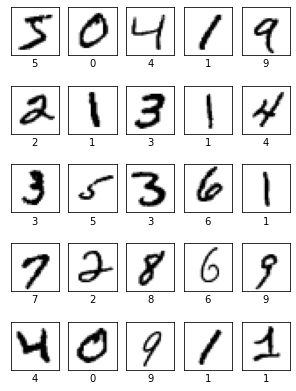

In [23]:

# 25개 데이터를 5개씩 출력하여 확인
plt.figure(figsize=(5,7))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [24]:
# 클래스를 두 개(0인 경우, 0이 아닌 경우)로 만들기
y_train5 = (y_train==0)
y_test5 = (y_test == 0)
print(y_train[1], y_train5[1])
print(y_test[1], y_test5[1])

0 True
2 False


In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 3-NN으로 2-class classification
knn = KNeighborsClassifier(n_neighbors=3)
print('knn training...')
knn.fit(X_train, y_train5)

# 테스트 데이터의 성능 확인
print('knn testing...')
y_pred = knn.predict(X_test)
acc= accuracy_score(y_test5, y_pred)
print('accuracy_score (MNIST 2-class, 3-NN) = {:.2f}'.format(acc))


knn training...
knn testing...
accuracy_score (MNIST 2-class, 3-NN) = 0.99


In [35]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression, 2-class classification
print('LogisticRegression training...')
logreg = LogisticRegression(max_iter=2000).fit(X_train, y_train5)

# 테스트 데이터의 성능 확인
print('LogisticRegression testing...')
y_pred=logreg.predict(X_test)

acc = accuracy_score(y_test5, y_pred)
print('accuracy_score (MNIST 2-class, LogisticRegression) = {:.2f}'.format(acc))

LogisticRegression training...
LogisticRegression testing...
accuracy_score (MNIST 2-class, LogisticRegression) = 0.99
